**Gregg Maloy   
Data 602   
Assignment 8**

**INTRODUCTION**   
Maternal mortality has been on the increase in the United States(US)(1). Health systems throughout the country are tasked with rectifying this problem. In the last assignment, it was confirmed that maternal mortality in NYC is trending upwards(2). In this assignment, we will examine the maternal mortality ratio (MMR) for G7 countries between the years 2000-2017.  More specifically, we will compare MMR's for the US to other G7 countries in order to assess whether increased maternal mortality in recent years is unique to the United States within the G7 group. As part of the assignement, duplicate line charts will be graphed using both matplotlib and seaborn libraries to assess differences between these two python libraries.

Data for this assignment was obtained from UNICEF and includes MMR's for year 2000-2017 for 185 countries (3). 

*Definitions*    
Maternal mortality ratio (MMR)   
"Defined as the number of maternal deaths during a given time period per 100 000 live births during the same time period."(3)

Maternal deaths     
"Defined as the death of a woman while pregnant or within 42 days of termination of pregnancy, 
irrespective of the duration and site of the pregnancy, from any cause related to or aggravated 
by the pregnancy or its management but not from accidental or incidental causes."(3)

1. NPR article: https://www.npr.org/sections/health-shots/2023/07/04/1185904749/u-s-maternal-deaths-keep-rising-heres-who-is-most-at-risk
2. Assignment on NYC Maternal Mortality: https://github.com/greggmaloy/Data_602/blob/main/assignment_7.ipynb
3. UNICEF Dataset: https://data.unicef.org/resources/dataset/maternal-mortality-data/

**DATA EXPLORATION**    
The dataset was obtained via the UNICEF website at https://data.unicef.org/resources/dataset/maternal-mortality-data/.

In [3]:
import pandas as pd

# Read data from a CSV file on GitHub with 'latin1' encoding
url = 'https://raw.githubusercontent.com/greggmaloy/Data_602/main/MMR.csv'
df = pd.read_csv(url, encoding='latin1')
df

,ISO Code,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AFG,Afghanistan,1450,1390,1300,1240,1180,1140,1120,1090,1030,993,954,905,858,810,786,701,673,638
1,ALB,Albania,23,23,21,21,18,22,18,19,20,20,21,22,17,16,16,15,16,15
2,DZA,Algeria,161,155,148,145,134,127,122,119,117,117,115,116,116,115,114,114,113,112
3,AGO,Angola,827,766,690,628,574,519,473,431,395,359,326,300,281,269,258,251,246,241
4,ATG,Antigua and Barbuda,44,44,43,44,41,40,46,48,50,45,44,43,44,43,42,43,43,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,VEN,Venezuela (Bolivarian Republic of),119,123,135,127,119,113,114,114,116,119,117,116,116,115,113,115,121,125
181,VNM,Viet Nam,68,65,62,59,57,54,51,49,49,48,47,47,46,46,45,45,44,43
182,YEM,Yemen,301,290,278,266,254,242,230,219,208,200,192,187,184,175,174,169,165,164
183,ZMB,Zambia,528,491,465,453,437,421,406,387,356,329,305,283,267,254,242,232,222,213


**Data Exploration Comments**     
Info(), describe(), isnull(), isna() and isnumeric() are utilized below to explore the dataset.    
The following are key takeaways:  

*df.info()*    
185 unique countries (rows)   
19 columns: 17 integers, 2 float objects   
The data types are appropriately coded for data   
Timeframe: 18 years (2000-2017)

*df.describe()*   
Data is in wide format   
Max numbers of MMR range between ~2500 per 100,000 live births to ~1000 deaths per 100,000 live births    
Min numbers of MMR range between 3 per 100,000 live births to 2 deaths per 100,000 live births    
Mean and interquartile range calculations are calculated for each year

*isnull() and isnan()*     
There are no nulls or missing values

*isnumeric()*    
All columns with numerical data only contain numeric data

In [4]:
#There are 19 columns: 17 integers, 2 float objects.
#There are a total of 185 rows 
#The data types are appropriately coded for data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ISO Code  185 non-null    object
 1   Country   185 non-null    object
 2   2000      185 non-null    int64 
 3   2001      185 non-null    int64 
 4   2002      185 non-null    int64 
 5   2003      185 non-null    int64 
 6   2004      185 non-null    int64 
 7   2005      185 non-null    int64 
 8   2006      185 non-null    int64 
 9   2007      185 non-null    int64 
 10  2008      185 non-null    int64 
 11  2009      185 non-null    int64 
 12  2010      185 non-null    int64 
 13  2011      185 non-null    int64 
 14  2012      185 non-null    int64 
 15  2013      185 non-null    int64 
 16  2014      185 non-null    int64 
 17  2015      185 non-null    int64 
 18  2016      185 non-null    int64 
 19  2017      185 non-null    int64 
dtypes: int64(18), object(2)
memory usage: 29.0+ KB


In [5]:
#There are 18 years of data
#Data is wide format
#Mean and interquartile range calculations are calculated for each year and appear to trend down in general
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,274.237838,266.037838,259.259459,250.654054,241.151351,229.994595,220.513514,211.772973,204.535135,197.972973,191.167568,185.129730,180.108108,175.875676,172.632432,167.967568,163.318919,159.340541
std,395.430101,381.037861,369.118262,355.145438,340.325386,324.074996,311.119492,298.896453,288.982341,279.282474,270.002393,262.007414,255.753595,252.234128,249.677237,242.914547,237.032861,232.613758
min,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,24.000000,23.000000,23.000000,21.000000,19.000000,19.000000,18.000000,17.000000,18.000000,18.000000,17.000000,15.000000,17.000000,16.000000,15.000000,14.000000,13.000000,13.000000
50%,77.000000,75.000000,72.000000,70.000000,71.000000,70.000000,65.000000,62.000000,60.000000,61.000000,63.000000,56.000000,56.000000,58.000000,56.000000,54.000000,54.000000,53.000000
75%,437.000000,423.000000,410.000000,395.000000,372.000000,348.000000,331.000000,306.000000,289.000000,276.000000,266.000000,259.000000,254.000000,238.000000,223.000000,217.000000,200.000000,186.000000
max,2480.000000,2250.000000,2080.000000,1960.000000,1850.000000,1760.000000,1680.000000,1610.000000,1530.000000,1450.000000,1360.000000,1270.000000,1210.000000,1180.000000,1190.000000,1180.000000,1140.000000,1150.000000


In [6]:
# There is no missing or invalid data as demonstrated by using isnull() and isna() below:
null_counts = df.isnull().sum()
print(null_counts)

ISO Code    0
Country     0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
dtype: int64


In [7]:
nan_counts = df.isna().sum()
print(nan_counts)

ISO Code    0
Country     0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
dtype: int64


In [8]:
years = range(2000, 2018)

# create a loop to assess if all numeric columns contain only numbers
for year in years:
    # new variable
    year_data = df[str(year)]
    
    # Check if all values are numeric
    if all(str(value).isnumeric() for value in year_data):
        print(f"Year {year}: All values are numeric.")
    else:
        print(f"Year {year}: Contains non-numeric values.")

Year 2000: All values are numeric.
Year 2001: All values are numeric.
Year 2002: All values are numeric.
Year 2003: All values are numeric.
Year 2004: All values are numeric.
Year 2005: All values are numeric.
Year 2006: All values are numeric.
Year 2007: All values are numeric.
Year 2008: All values are numeric.
Year 2009: All values are numeric.
Year 2010: All values are numeric.
Year 2011: All values are numeric.
Year 2012: All values are numeric.
Year 2013: All values are numeric.
Year 2014: All values are numeric.
Year 2015: All values are numeric.
Year 2016: All values are numeric.
Year 2017: All values are numeric.


**DATA WRANGLING**    
Now that exploration is complete, we will wrangle the data to prepare for plotting.  As the data is relatively tidy, the only major wrangling task is to convert the data to long format.  

In [9]:
#converting to long format
from matplotlib import pyplot as plt
df_long = pd.melt(df, id_vars=['ISO Code', 'Country'], var_name='Year', value_name='Number of Deaths')
df_long.head(5)

,ISO Code,Country,Year,Number of Deaths
0,AFG,Afghanistan,2000,1450
1,ALB,Albania,2000,23
2,DZA,Algeria,2000,161
3,AGO,Angola,2000,827
4,ATG,Antigua and Barbuda,2000,44


**PLOTTING US MMR WITH MATPLOTLIB**   
Below, we evaluate the MMR specifically for the United States, making adjustments to certain plot aspects to meet the metrics outlined in the assignment.  Once assignment metrics are fulfilled, US MMR's will be compared to MMR's in the other G7 countries.

The below describes the actions taken to fulfill assignment metrics in order of occurrence:
1. Plot MMR's for US in timeframe 2000-2017
2. Grid lines set to false and x-axis labels are rotated to increase readability.
3. Labels and titles are added
4. Legend added
5. Legend location changed, annotation added, tick font size changed

([<matplotlib.axis.XTick at 0x1f66e8aa200>,
 [Text(0.0, 0, '2000'),
  Text(1.0, 0, '2001'),
  Text(2.0, 0, '2002'),
  Text(3.0, 0, '2003'),
  Text(4.0, 0, '2004'),
  Text(5.0, 0, '2005'),
  Text(6.0, 0, '2006'),
  Text(7.0, 0, '2007'),
  Text(8.0, 0, '2008'),
  Text(9.0, 0, '2009'),
  Text(10.0, 0, '2010'),
  Text(11.0, 0, '2011'),
  Text(12.0, 0, '2012'),
  Text(13.0, 0, '2013'),
  Text(14.0, 0, '2014'),
  Text(15.0, 0, '2015'),
  Text(16.0, 0, '2016'),
  Text(17.0, 0, '2017')])

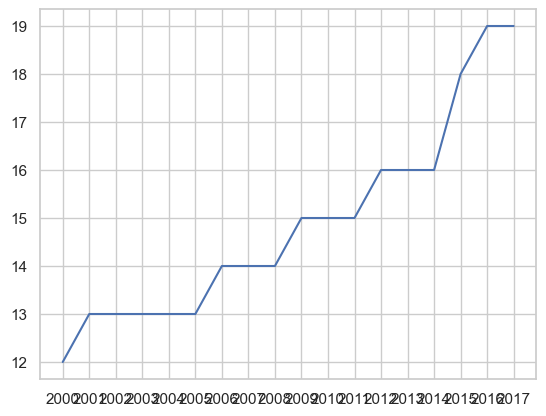

In [10]:
# Filter US only
US_df = df_long[df_long['Country'] == 'United States']

#plotting dataframe
plt.plot(US_df['Year'], US_df['Number of Deaths'])
plt.xticks(US_df['Year'])#, rotation=45) 

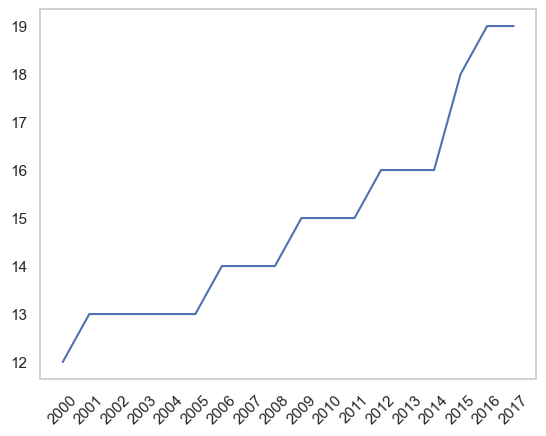

In [11]:
#plotting the line and rotate labels to increase readability
plt.plot(US_df['Year'], US_df['Number of Deaths'])
plt.xticks(US_df['Year'], rotation=45) 
#Turn off grid 
plt.grid(False)

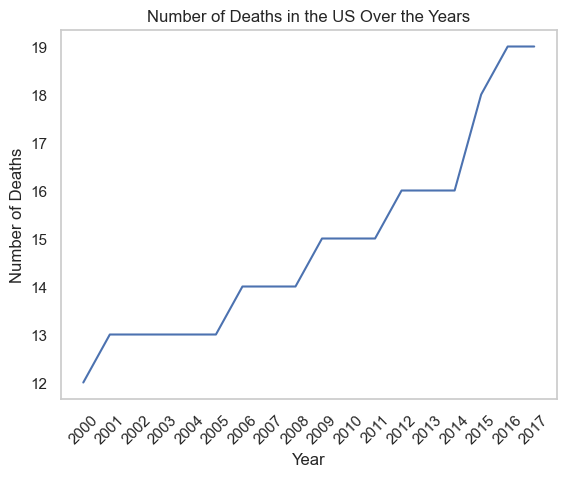

In [12]:
plt.plot(US_df['Year'], US_df['Number of Deaths'])
plt.xticks(US_df['Year'], rotation=45) 
#adding axis labels
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
#adding title
plt.title('Number of Deaths in the US Over the Years')
plt.grid(False)

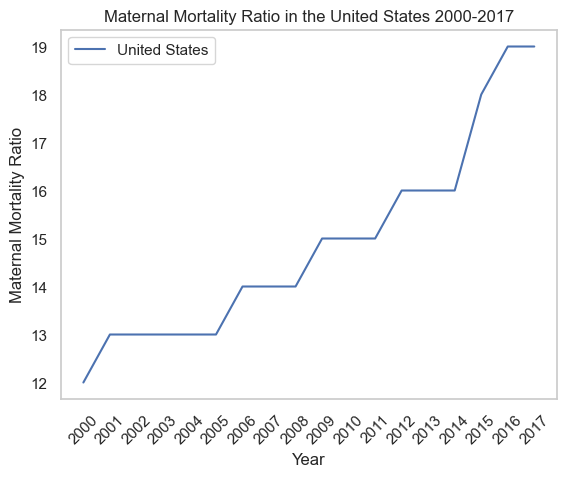

In [25]:
plt.plot(US_df['Year'], US_df['Number of Deaths'])
plt.xticks(US_df['Year'], rotation=45) 
plt.xlabel('Year')
plt.ylabel('Maternal Mortality Ratio')
plt.title('Maternal Mortality Ratio in the United States 2000-2017')
plt.grid(False)
#legend added
plt.legend(['United States']) 

**Final US MMR Line Plot**   
The below is the final plot for US MMR's and can be read as:    
MMR's in United States between years 2000-2017 have increased from 12 deaths per 100,000 live births to 19 deaths per 100,000 live births.

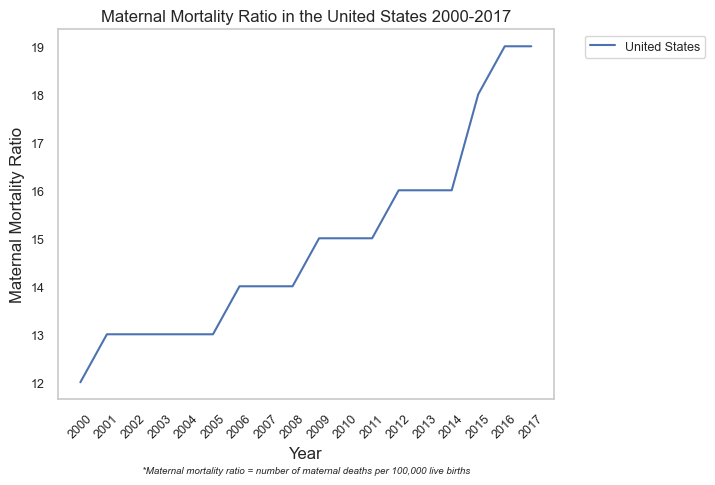

In [26]:
plt.plot(US_df['Year'], US_df['Number of Deaths'])
plt.xticks(US_df['Year'], rotation=45) 
plt.xlabel('Year')
plt.ylabel('Maternal Mortality Ratio')
#changing tick font size
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('Maternal Mortality Ratio in the United States 2000-2017')
plt.grid(False)

#changing the legend lcoation and size
plt.legend(['United States'],bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 9})

# adding a annotation
plt.annotate(
    '*Maternal mortality ratio = number of maternal deaths per 100,000 live births',
    xy=(0.5, -0.2),  # Position under the y-axis
    xycoords='axes fraction',
    fontsize=7,  # Set font size for the annotation
    horizontalalignment='center',
    style='italic'  # Italicize the text
)

plt.show()


**WRANGLING & PLOTTING FOR G7 COUNTRIES USING MATPLOTLIB**   
At this stage, assignment metrics have been met. Now, let's compare the MMR's of all G7 countries against that of the United States. In addition to the line plot, trend/regression lines have been included to help viewers identify any countries that have experienced an increase in MMRs. Below, the only other G7 country which was determined to have a increasing MMR is Canada. 

In [27]:
import pandas as pd

#G7 countries
g7_countries = ['United States', 'Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom']

#Pivot the DataFrame to have G7 countries as columns
pivoted_df = df_long[df_long['Country'].isin(g7_countries)].pivot(index='Year', columns='Country', values='Number of Deaths')

#Reset index
pivoted_df.reset_index(inplace=True)
print(pivoted_df)


Country  Year  Canada  France  Germany  Italy  Japan  United Kingdom  \
0        2000       9      10        7      4      9              10   
1        2001      10      10        7      3      8              11   
2        2002      10      10        7      3      8              11   
3        2003      10       9        6      3      7              11   
4        2004      10       9        6      3      7              11   
5        2005      11       9        6      3      7              11   
6        2006      11       9        6      2      7              11   
7        2007      11       9        6      2      6              11   
8        2008      12       9        6      2      6              11   
9        2009      12       9        6      2      6              10   
10       2010      11       9        6      2      6              10   
11       2011      11       9        6      2      6               9   
12       2012      11       9        5      2      5            

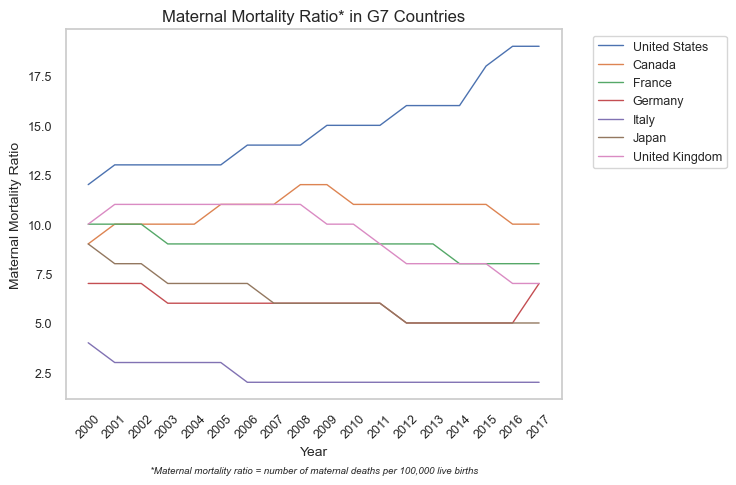

In [28]:
import matplotlib.ticker as ticker

# Create a line plot for G7 countries
for country in g7_countries:
    plt.plot(pivoted_df['Year'], pivoted_df[country], label=country, linewidth=1.0)

# labels and title
plt.xticks(pivoted_df['Year'], rotation=45) 
plt.xlabel('Year',fontsize=10)
plt.ylabel('Maternal Mortality Ratio',fontsize=10)
plt.title('Maternal Mortality Ratio* in G7 Countries')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)


# Set the y-axis to even numbers
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=2))

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 9})

plt.annotate(
    '*Maternal mortality ratio = number of maternal deaths per 100,000 live births',
    xy=(0.5, -0.2),  
    xycoords='axes fraction',
    fontsize=7,  
    horizontalalignment='center',
    style='italic'  
)

plt.grid(False)
plt.show()

**Adding Regression Lines**    
While the above plot does demonstate that US MMR's have increased at a pace which exceeds other G7 countries, it is difficult to assess the overall MMR trends of countries individually.  Below, regression lines are introduced to better assess the slope and direction of the MMR trends per country.  As demonstrated below, the use of regression lines allows us to uncover that Canada's MMR also increased within the same time period.  Of note, I tried to include confidence intervals/confidence bands in the line chart but ultimately was unable to include.  Also, I was unable to resolve the duplication issue within the legend.

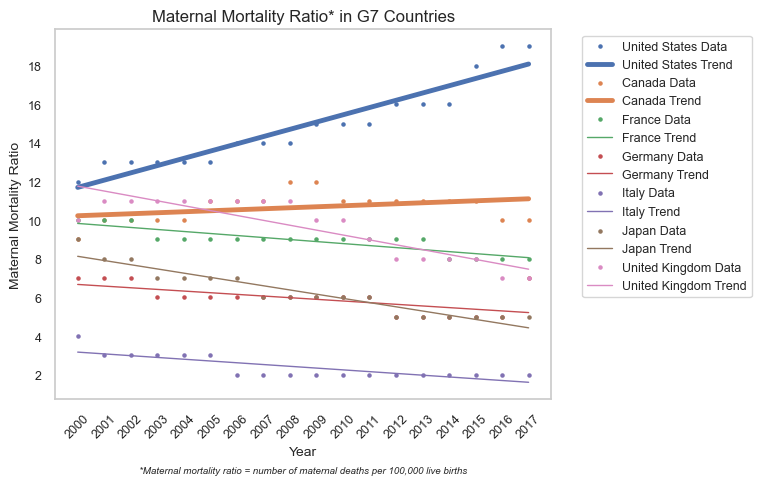

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Convert Year column to numeric, it was throwing an error
pivoted_df['Year'] = pd.to_numeric(pivoted_df['Year'], errors='coerce')

# Add trend lines for G7 
for country in g7_countries:
    x = pivoted_df['Year']
    y = pivoted_df[country]
    
    # Plot data points
    plt.scatter(x, y, label=f'{country} Data', s=5)
    coefficients = np.polyfit(x, y, 1)
    trend = np.poly1d(coefficients)
    if country in ["Canada", "United States"]:
        # Increase line weight for Canada and United States
        plt.plot(x, trend(x), label=f'{country} Trend', linewidth=3.5)
    else:
        plt.plot(x, trend(x), label=f'{country} Trend', linewidth=1)
# Set the x-axis to show every year
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
# Set the y-axis to show even numbers
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=2))        
        
plt.xlabel('Year', fontsize=10)
plt.ylabel('Maternal Mortality Ratio', fontsize=10)
plt.xticks(fontsize=9,rotation=45)
plt.yticks(fontsize=9)
plt.title('Maternal Mortality Ratio* in G7 Countries', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 9})

# Annotation 
plt.annotate(
    '*Maternal mortality ratio = number of maternal deaths per 100,000 live births',
    xy=(0.5, -0.2),  # Position under the y-axis
    xycoords='axes fraction',
    fontsize=7,  # Set font size for the annotation
    horizontalalignment='center',
    style='italic'  # Italicize the text
)
plt.grid(False)
plt.show()

**PLOTTING FOR G7 COUNTRIES USING SEABORN**    
The same graphs were recreated using seaborn.  Seaborn was easier to use and I was successful in placing confidence bands around the regression lines.

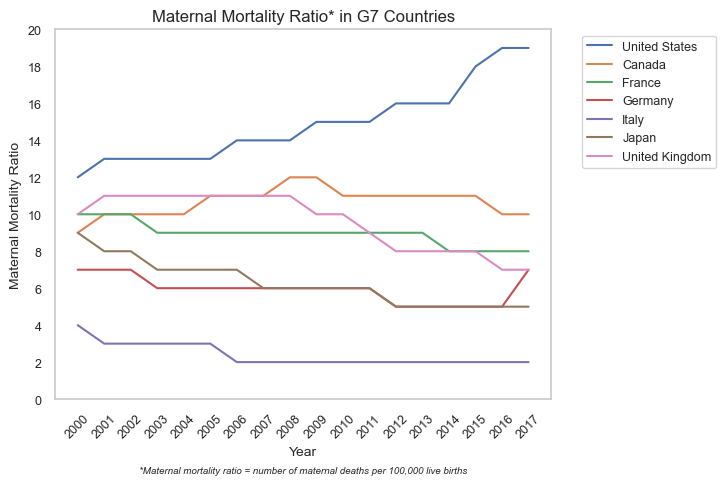

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming g7_countries is defined earlier
g7_countries = ['United States', 'Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom']


# Create a line plot for each G7 country

for country in g7_countries:
    sns.lineplot(data=pivoted_df, x='Year', y=country, label=country, markers=True)

# Add labels and title
plt.xlabel('Year', fontsize=10)
plt.ylabel('Maternal Mortality Ratio', fontsize=10)
plt.title('Maternal Mortality Ratio* in G7 Countries', fontsize=12)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 9})
plt.yticks(range(0, int(pivoted_df[g7_countries].max().max()) + 2, 2),fontsize=9)
plt.xticks(pivoted_df['Year'],fontsize=9, rotation=45)
plt.grid(False)
# Annotation 
plt.annotate(
    '*Maternal mortality ratio = number of maternal deaths per 100,000 live births',
    xy=(0.5, -0.2),  # Position under the y-axis
    xycoords='axes fraction',
    fontsize=7,  # Set font size for the annotation
    horizontalalignment='center',
    style='italic'  # Italicize the text
)
plt.show()

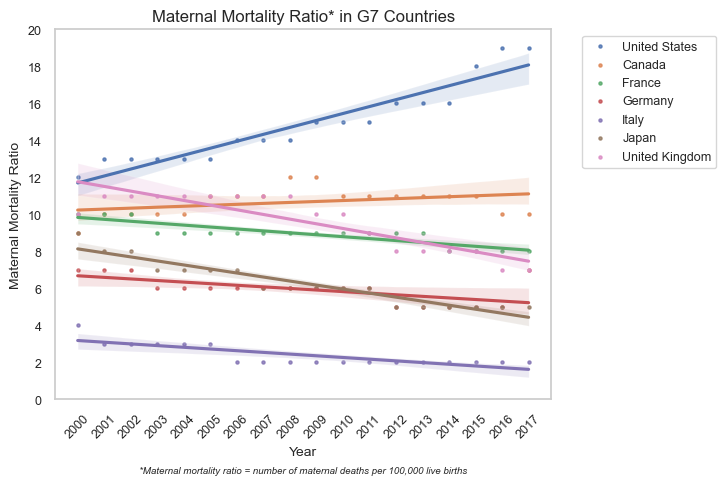

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming g7_countries is defined earlier
g7_countries = ['United States', 'Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom']

# Set Seaborn style
sns.set(style="whitegrid")

pivoted_df['Year'] = pd.to_numeric(pivoted_df['Year'])

# Create a line plot with regression lines for each G7 country
for country in g7_countries:
    sns.regplot(data=pivoted_df, x='Year', y=country, label=country, scatter_kws={'s': 5})

# Add labels and title
plt.xlabel('Year', fontsize=10)
plt.ylabel('Maternal Mortality Ratio', fontsize=10)
plt.title('Maternal Mortality Ratio* in G7 Countries', fontsize=12)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 9})
plt.yticks(range(0, int(pivoted_df[g7_countries].max().max()) + 2, 2),fontsize=9)
plt.xticks(pivoted_df['Year'], rotation=45,fontsize=9)
# Add a legend
plt.grid(False)
# Annotation 
plt.annotate(
    '*Maternal mortality ratio = number of maternal deaths per 100,000 live births',
    xy=(0.5, -0.2),  # Position under the y-axis
    xycoords='axes fraction',
    fontsize=7,  # Set font size for the annotation
    horizontalalignment='center',
    style='italic'  # Italicize the text
)
plt.show()

**Conclusion**    
Among G7 countries, both the United States and, to a lesser extent, Canada both have seen increased MMR's for years 2000-2017.  

In terms of data and differences between Seaborn and Matplotlib for creating line charts:
The dataset was relatively clean and easily tidied, minimizing the need for extensive wrangling. This facilitated both data exploration and visualization. Seaborn was more user-friendly for running a regression analysis, plotting confidence bands and solving the duplicity issue I encountered with the legend in matplotlib.  Seaborn also required less code to achieve similar results. 